Fourier Series
========

+ Try to calculate a fourier series in python


In [1]:
from __future__ import division
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


## main functions

+ use `sn = fourier_series(f, N, offset=0, period=2*np.pi)` to create a fourier series of function $f(x)$ in range $(offset,\; offset+period)$
+ use `sn(t)` to calculate $S_n(x)$

In [2]:
class fourier_series :
    def __init__(self, f, N, offset=0, period=2*np.pi) :
        self.N = N
        self.period = period
        self.offset = offset
        self.c = np.zeros(2*N+1, dtype=complex)
        for n in range(-N, N+1) :
            self.c[n] = complex(integrate.quad(lambda x : (f(x)*np.exp(-2.0j*np.pi*n*x/period)).real, \
                                          offset, offset + period)[0], \
                           integrate.quad(lambda x : (f(x)*np.exp(-2.0j*np.pi*n*x/period)).imag, \
                                          offset, offset + period)[0])/period
        self._v_sn = np.vectorize(self._sn)
    
    def _sn(self, x) :
        ans = 0.0j
        for n in range(-self.N, self.N+1) :
            ans += self.c[n] * np.exp(2.0j*np.pi*n*(x-self.offset)/self.period)
        return ans
    
    def __call__(self, x) :
        return self._v_sn(x)

### Example 1:

In [3]:
@np.vectorize
def f(x) :
    return np.floor(x)%2

s = fourier_series(f, 10, 0., 2.)
s

<__main__.fourier_series instance at 0x11247cfc8>

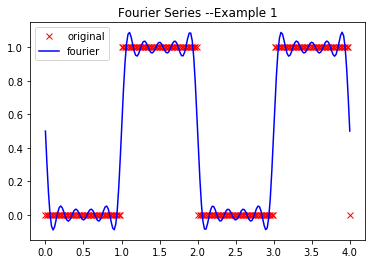

In [4]:
t = np.linspace(0, 4, 200)
plt.plot(t, f(t), 'rx', t, s(t).real, 'b-')
plt.legend(['original', 'fourier'])
plt.title('Fourier Series --Example 1')
plt.show()

### Another example

Here we want to calculate the function which is given by a series of $\sin$s and $\cos$s of a star.

In [5]:
from scipy.interpolate import interp1d

To get started, at first we find the verteices in complex value like this:

In [6]:
s = np.array([np.exp(4.0j*np.pi*x/5.) for x in range(6)])

Then, we may transfer the lines into a real->complex function:

In [7]:
_t = np.linspace(0., 2*np.pi, num=len(s))
g = interp1d(_t, s)

And now create a Fourier Series:

In [8]:
fs = fourier_series(g, 4)
t = np.linspace(0., 2*np.pi, 200)

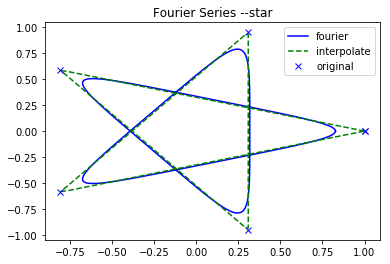

In [9]:
plt.plot(fs(t).real, fs(t).imag, 'b-', label='fourier')
plt.plot(g(t).real, g(t).imag, 'g--', label='interpolate')
plt.plot(s.real, s.imag, 'bx', label='original')
plt.legend()
plt.title('Fourier Series --star')
plt.show()